In [ ]:
import pathlib
data_dir = pathlib.Path('/content/drive/MyDrive/img_categories/COVID-19 vs No_Finding')

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from PIL import Image

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  shuffle=True,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1043 files belonging to 2 classes.
Using 835 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  shuffle=True,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1043 files belonging to 2 classes.
Using 208 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['COVID-19', 'No_Finding']


In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off") 

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
num_classes = 2

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.LeakyReLU(),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

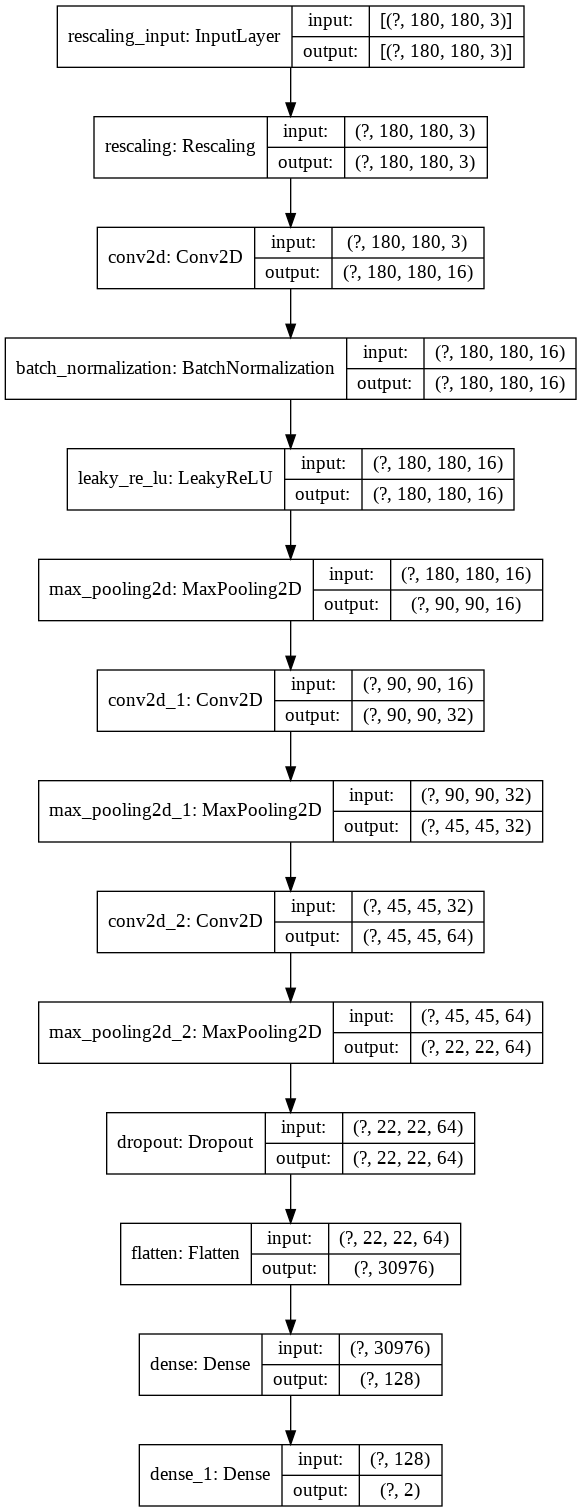

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 16)      448       
_________________________________________________________________
batch_normalization (BatchNo (None, 180, 180, 16)      64        
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 180, 180, 16)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 32)        0

In [ ]:
epochs=15

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
27/27 [==============================] - 156s 6s/step - loss: 0.4312 - accuracy: 0.8982 - val_loss: 0.4996 - val_accuracy: 0.9183
Epoch 2/15
27/27 [==============================] - 31s 1s/step - loss: 0.0626 - accuracy: 0.9856 - val_loss: 0.4249 - val_accuracy: 0.9375
Epoch 3/15
27/27 [==============================] - 32s 1s/step - loss: 0.0460 - accuracy: 0.9892 - val_loss: 0.3609 - val_accuracy: 0.9423
Epoch 4/15
27/27 [==============================] - 32s 1s/step - loss: 0.0394 - accuracy: 0.9916 - val_loss: 0.3185 - val_accuracy: 0.9471
Epoch 5/15
27/27 [==============================] - 33s 1s/step - loss: 0.0244 - accuracy: 0.9940 - val_loss: 0.3089 - val_accuracy: 0.9423
Epoch 6/15
27/27 [==============================] - 33s 1s/step - loss: 0.0192 - accuracy: 0.9964 - val_loss: 0.2471 - val_accuracy: 0.9423
Epoch 7/15
27/27 [==============================] - 32s 1s/step - loss: 0.0106 - accuracy: 0.9964 - val_loss: 0.2302 - val_accuracy: 0.9471
Epoch 8/15
27/27 [=

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
path = pathlib.Path('/content/drive/MyDrive/img_categories/COVID-19 vs No_Finding/No_Finding/IM-0211-0001.jpeg')
img = keras.preprocessing.image.load_img(
    path, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to No_Finding with a 100.00 percent confidence.
